
Training K-Nearest Neighbors...


KNeighborsClassifier(weights='distance')


K-Nearest Neighbors Evaluation:
Accuracy: 65.00%
F1 Score: 0.6382
Precision: 0.6395
Recall: 0.6500


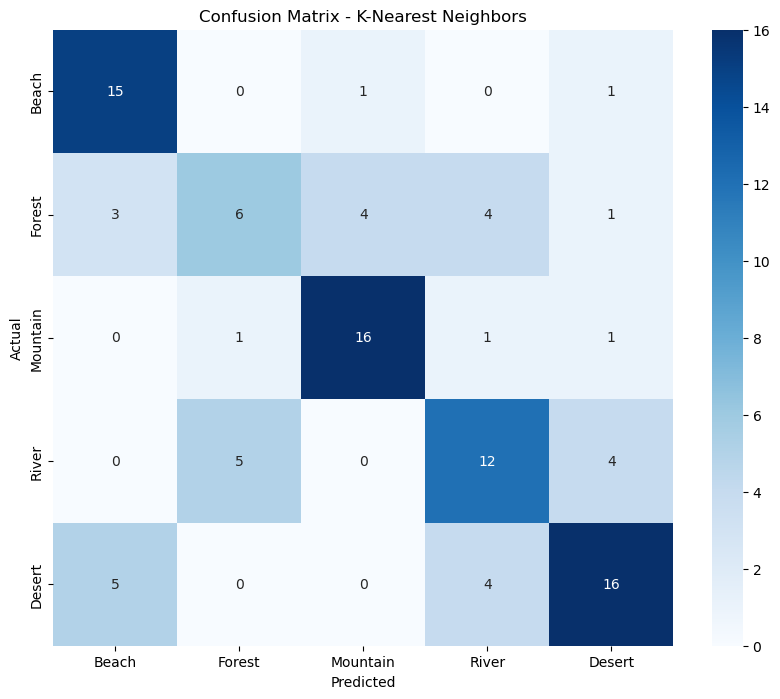


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

       Beach       0.65      0.88      0.75        17
      Forest       0.50      0.33      0.40        18
    Mountain       0.76      0.84      0.80        19
       River       0.57      0.57      0.57        21
      Desert       0.70      0.64      0.67        25

    accuracy                           0.65       100
   macro avg       0.64      0.65      0.64       100
weighted avg       0.64      0.65      0.64       100


Training Support Vector Machine...


SVC(gamma='auto', random_state=0)


Support Vector Machine Evaluation:
Accuracy: 73.00%
F1 Score: 0.7278
Precision: 0.7302
Recall: 0.7300


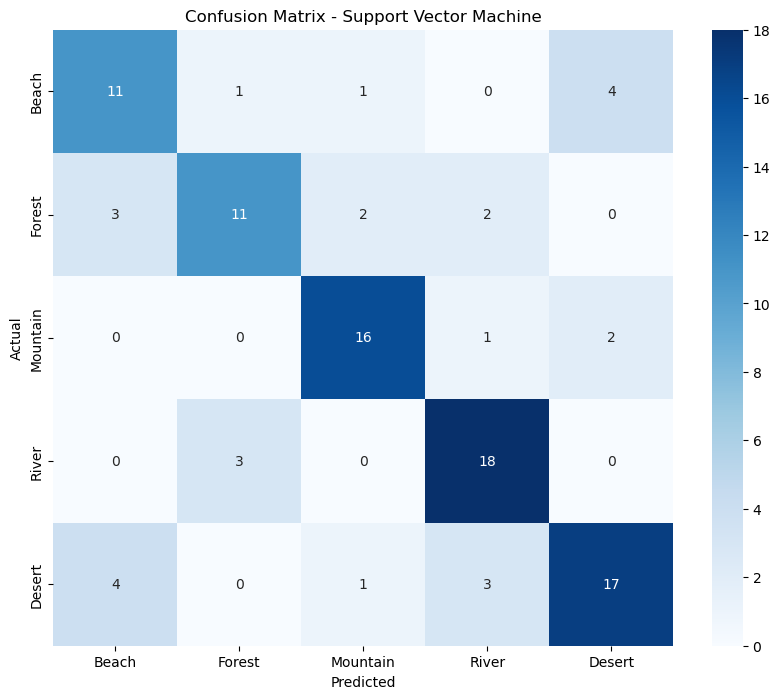


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

       Beach       0.61      0.65      0.63        17
      Forest       0.73      0.61      0.67        18
    Mountain       0.80      0.84      0.82        19
       River       0.75      0.86      0.80        21
      Desert       0.74      0.68      0.71        25

    accuracy                           0.73       100
   macro avg       0.73      0.73      0.72       100
weighted avg       0.73      0.73      0.73       100


Training Random Forest...


RandomForestClassifier(random_state=0)


Random Forest Evaluation:
Accuracy: 68.00%
F1 Score: 0.6797
Precision: 0.6836
Recall: 0.6800


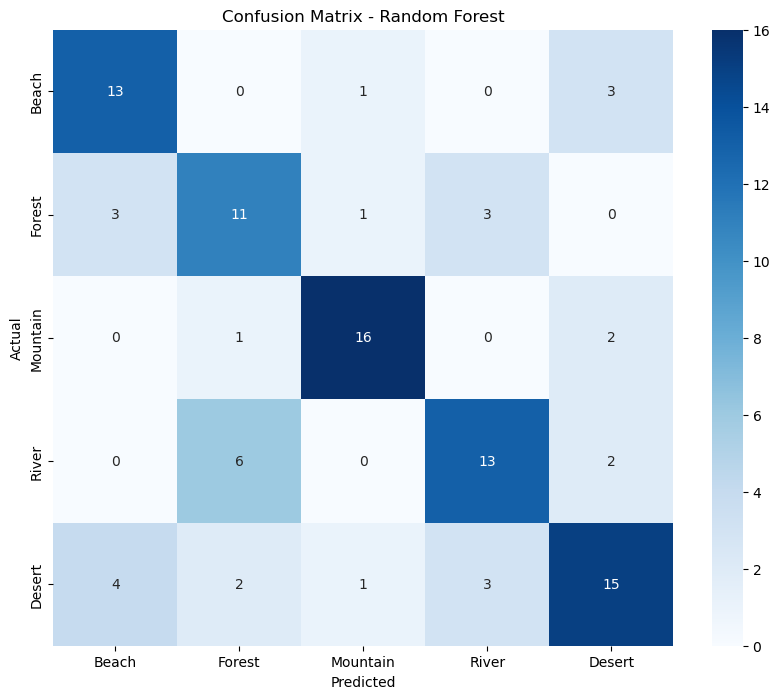


Classification Report for Random Forest:
              precision    recall  f1-score   support

       Beach       0.65      0.76      0.70        17
      Forest       0.55      0.61      0.58        18
    Mountain       0.84      0.84      0.84        19
       River       0.68      0.62      0.65        21
      Desert       0.68      0.60      0.64        25

    accuracy                           0.68       100
   macro avg       0.68      0.69      0.68       100
weighted avg       0.68      0.68      0.68       100


Training XGBoost...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


XGBoost Evaluation:
Accuracy: 70.00%
F1 Score: 0.6950
Precision: 0.7023
Recall: 0.7000


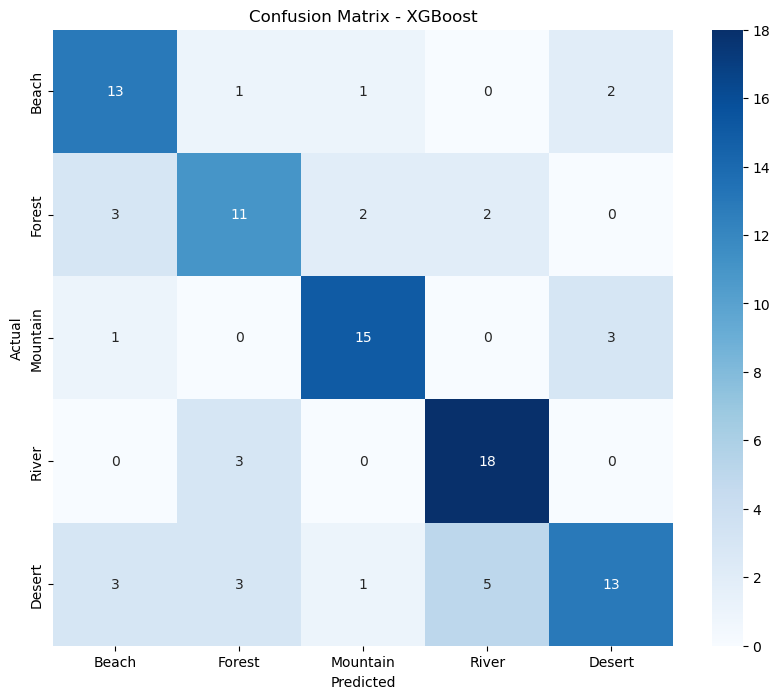


Classification Report for XGBoost:
              precision    recall  f1-score   support

       Beach       0.65      0.76      0.70        17
      Forest       0.61      0.61      0.61        18
    Mountain       0.79      0.79      0.79        19
       River       0.72      0.86      0.78        21
      Desert       0.72      0.52      0.60        25

    accuracy                           0.70       100
   macro avg       0.70      0.71      0.70       100
weighted avg       0.70      0.70      0.69       100


Summary of Results:

K-Nearest Neighbors:
  Accuracy: 0.6500
  F1 Score: 0.6382
  Precision: 0.6395
  Recall: 0.6500

Support Vector Machine:
  Accuracy: 0.7300
  F1 Score: 0.7278
  Precision: 0.7302
  Recall: 0.7300

Random Forest:
  Accuracy: 0.6800
  F1 Score: 0.6797
  Precision: 0.6836
  Recall: 0.6800

XGBoost:
  Accuracy: 0.7000
  F1 Score: 0.6950
  Precision: 0.7023
  Recall: 0.7000


In [78]:
# 5 types testing
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score,recall_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def extract_lbp_features(image, num_points=24, radius=8, eps=1e-7):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = feature.local_binary_pattern(image, num_points, radius, method="uniform")

    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)

    return hist


def evaluate_model(model, X_test, y_test, model_name, categories):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=categories))

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


categories = ["Beach", "Forest", "Mountain", "River", "Desert"]

data = []
labels = []

base_path = "Landscapes"

for category in categories:
    category_path = os.path.join(base_path, category)
    for i in range(1, 101):
        img_path = os.path.join(category_path, f"{i:03d}.jpg")
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_lbp_features(image)
            data.append(features)
            labels.append(category)

data = np.array(data)
labels = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = [
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0) 
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
    }
]

results = []
for clf in classifiers:
    print(f"\nTraining {clf['name']}...")
    clf['model'].fit(X_train_scaled, y_train)

    metrics = evaluate_model(clf['model'], X_test_scaled, y_test, clf['name'], categories)
    results.append(metrics)


print("\nSummary of Results:")
for result in results:
    print(f"\n{result['model']}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1 Score: {result['f1']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")


Training K-Nearest Neighbors...


KNeighborsClassifier(weights='distance')


K-Nearest Neighbors Evaluation:
Accuracy: 43.00%
F1 Score: 0.4241
Precision: 0.4328
Recall: 0.4300


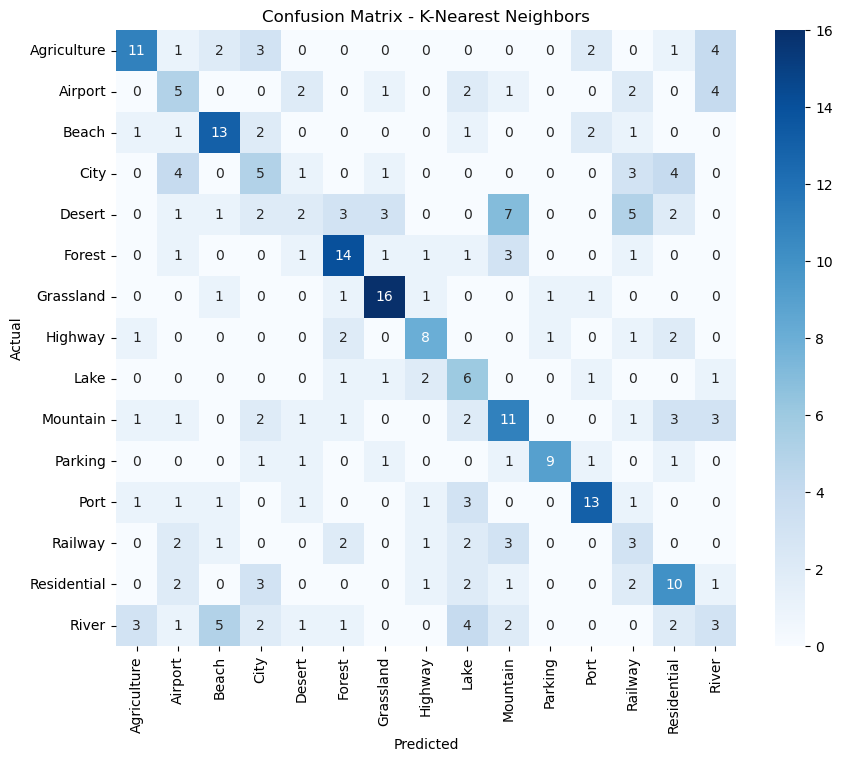


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

 Agriculture       0.61      0.46      0.52        24
     Airport       0.25      0.29      0.27        17
       Beach       0.54      0.62      0.58        21
        City       0.25      0.28      0.26        18
      Desert       0.20      0.08      0.11        26
      Forest       0.56      0.61      0.58        23
   Grassland       0.67      0.76      0.71        21
     Highway       0.53      0.53      0.53        15
        Lake       0.26      0.50      0.34        12
    Mountain       0.38      0.42      0.40        26
     Parking       0.82      0.60      0.69        15
        Port       0.65      0.59      0.62        22
     Railway       0.15      0.21      0.18        14
 Residential       0.40      0.45      0.43        22
       River       0.19      0.12      0.15        24

    accuracy                           0.43       300
   macro avg       0.43      0.4

SVC(gamma='auto', random_state=0)


Support Vector Machine Evaluation:
Accuracy: 51.33%
F1 Score: 0.5097
Precision: 0.5499
Recall: 0.5133


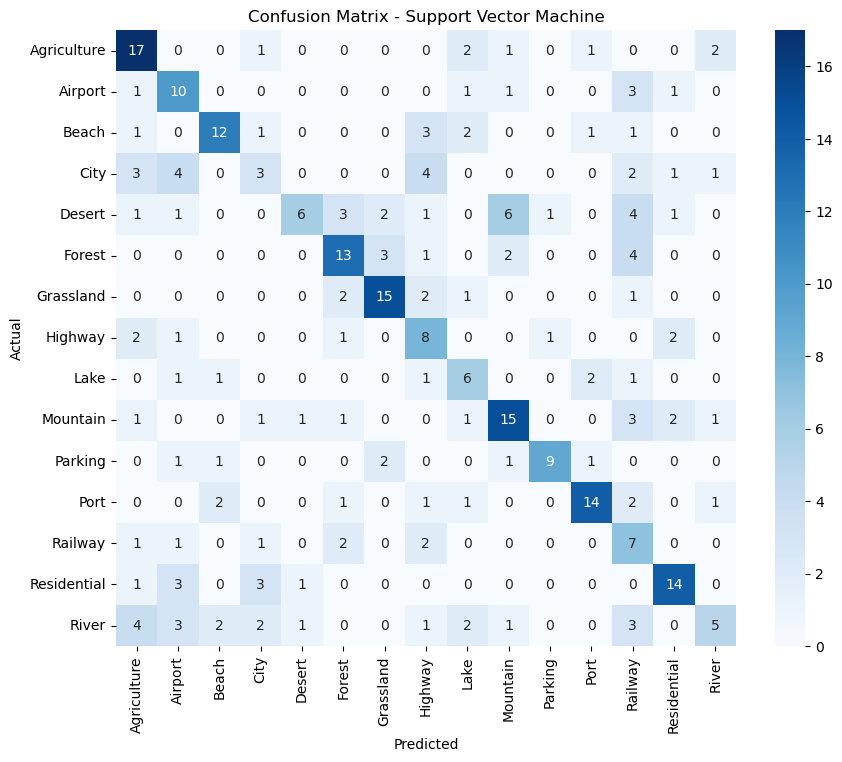


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

 Agriculture       0.53      0.71      0.61        24
     Airport       0.40      0.59      0.48        17
       Beach       0.67      0.57      0.62        21
        City       0.25      0.17      0.20        18
      Desert       0.67      0.23      0.34        26
      Forest       0.57      0.57      0.57        23
   Grassland       0.68      0.71      0.70        21
     Highway       0.33      0.53      0.41        15
        Lake       0.38      0.50      0.43        12
    Mountain       0.56      0.58      0.57        26
     Parking       0.82      0.60      0.69        15
        Port       0.74      0.64      0.68        22
     Railway       0.23      0.50      0.31        14
 Residential       0.67      0.64      0.65        22
       River       0.50      0.21      0.29        24

    accuracy                           0.51       300
   macro avg       0.53      

RandomForestClassifier(random_state=0)


Random Forest Evaluation:
Accuracy: 46.00%
F1 Score: 0.4547
Precision: 0.4713
Recall: 0.4600


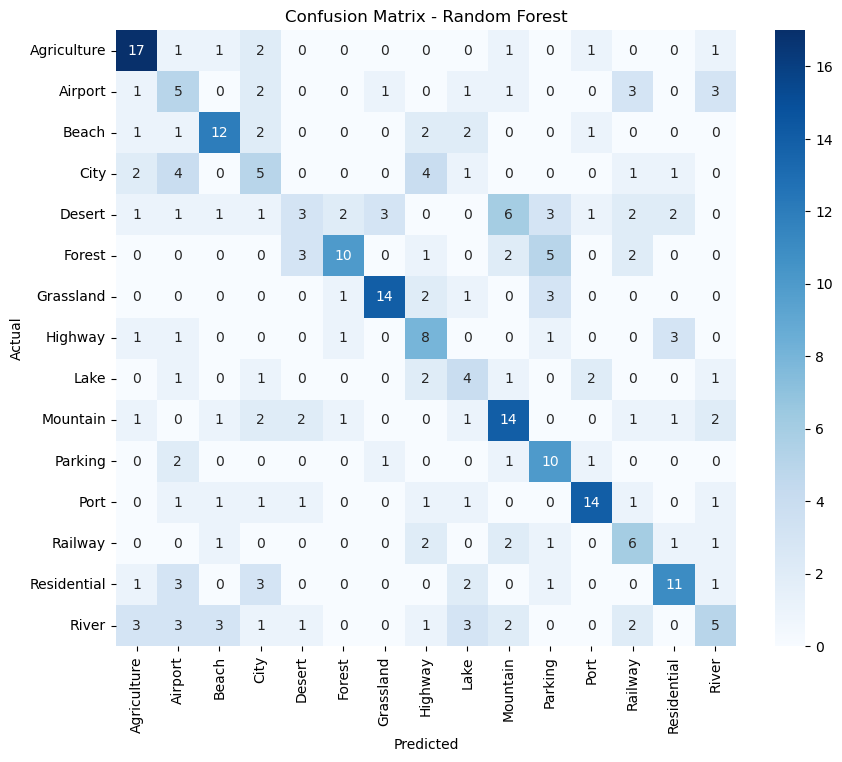


Classification Report for Random Forest:
              precision    recall  f1-score   support

 Agriculture       0.61      0.71      0.65        24
     Airport       0.22      0.29      0.25        17
       Beach       0.60      0.57      0.59        21
        City       0.25      0.28      0.26        18
      Desert       0.30      0.12      0.17        26
      Forest       0.67      0.43      0.53        23
   Grassland       0.74      0.67      0.70        21
     Highway       0.35      0.53      0.42        15
        Lake       0.25      0.33      0.29        12
    Mountain       0.47      0.54      0.50        26
     Parking       0.42      0.67      0.51        15
        Port       0.70      0.64      0.67        22
     Railway       0.33      0.43      0.38        14
 Residential       0.58      0.50      0.54        22
       River       0.33      0.21      0.26        24

    accuracy                           0.46       300
   macro avg       0.45      0.46     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


XGBoost Evaluation:
Accuracy: 45.67%
F1 Score: 0.4559
Precision: 0.4705
Recall: 0.4567


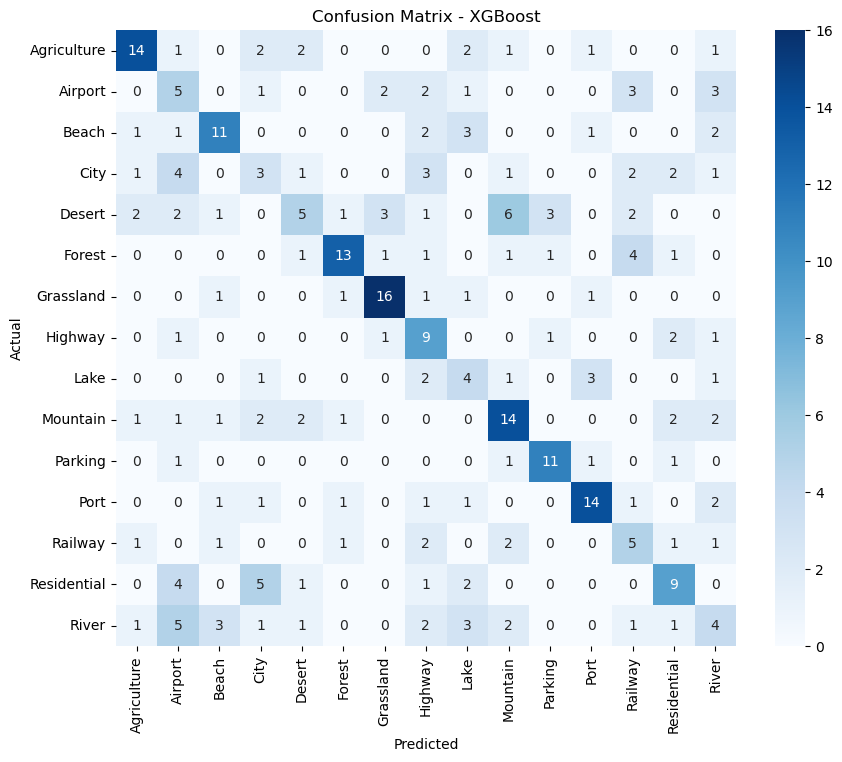


Classification Report for XGBoost:
              precision    recall  f1-score   support

 Agriculture       0.67      0.58      0.62        24
     Airport       0.20      0.29      0.24        17
       Beach       0.58      0.52      0.55        21
        City       0.19      0.17      0.18        18
      Desert       0.38      0.19      0.26        26
      Forest       0.72      0.57      0.63        23
   Grassland       0.70      0.76      0.73        21
     Highway       0.33      0.60      0.43        15
        Lake       0.24      0.33      0.28        12
    Mountain       0.48      0.54      0.51        26
     Parking       0.69      0.73      0.71        15
        Port       0.67      0.64      0.65        22
     Railway       0.28      0.36      0.31        14
 Residential       0.47      0.41      0.44        22
       River       0.22      0.17      0.19        24

    accuracy                           0.46       300
   macro avg       0.45      0.46      0.45 

In [80]:
#all types, grayscale lbp with classifiers including knn, svm, random forest and XGboost
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def extract_lbp_features(image, num_points=24, radius=8, eps=1e-7):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = feature.local_binary_pattern(image, num_points, radius, method="uniform")

    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)

    return hist


def evaluate_model(model, X_test, y_test, model_name, categories):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=categories))

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

categories = [
    "Agriculture", "Airport", "Beach", "City", "Desert",
    "Forest", "Grassland", "Highway", "Lake", "Mountain",
    "Parking", "Port", "Railway", "Residential", "River"
]

data = []
labels = []

base_path = "Landscapes"

for category in categories:
    category_path = os.path.join(base_path, category)
    for i in range(1, 101):
        img_path = os.path.join(category_path, f"{i:03d}.jpg")
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_lbp_features(image)
            data.append(features)
            labels.append(category)

data = np.array(data)
labels = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = [
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0) 
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
    }
]

results = []
for clf in classifiers:
    print(f"\nTraining {clf['name']}...")
    clf['model'].fit(X_train_scaled, y_train)

    metrics = evaluate_model(clf['model'], X_test_scaled, y_test, clf['name'], categories)
    results.append(metrics)

print("\nSummary of Results:")
for result in results:
    print(f"\n{result['model']}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1 Score: {result['f1']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")


Training K-Nearest Neighbors...


KNeighborsClassifier(weights='distance')


K-Nearest Neighbors Evaluation:
Accuracy: 65.67%
F1 Score: 0.6545
Precision: 0.6694
Recall: 0.6567


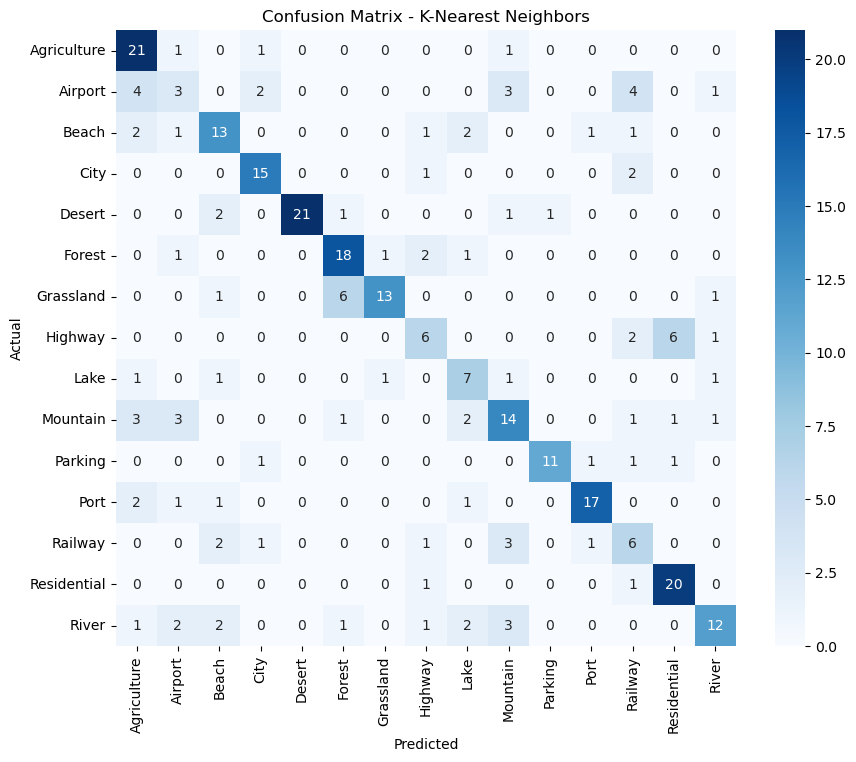


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

 Agriculture       0.62      0.88      0.72        24
     Airport       0.25      0.18      0.21        17
       Beach       0.59      0.62      0.60        21
        City       0.75      0.83      0.79        18
      Desert       1.00      0.81      0.89        26
      Forest       0.67      0.78      0.72        23
   Grassland       0.87      0.62      0.72        21
     Highway       0.46      0.40      0.43        15
        Lake       0.47      0.58      0.52        12
    Mountain       0.54      0.54      0.54        26
     Parking       0.92      0.73      0.81        15
        Port       0.85      0.77      0.81        22
     Railway       0.33      0.43      0.38        14
 Residential       0.71      0.91      0.80        22
       River       0.71      0.50      0.59        24

    accuracy                           0.66       300
   macro avg       0.65      0.6

SVC(gamma='auto', random_state=0)


Support Vector Machine Evaluation:
Accuracy: 68.33%
F1 Score: 0.6780
Precision: 0.6810
Recall: 0.6833


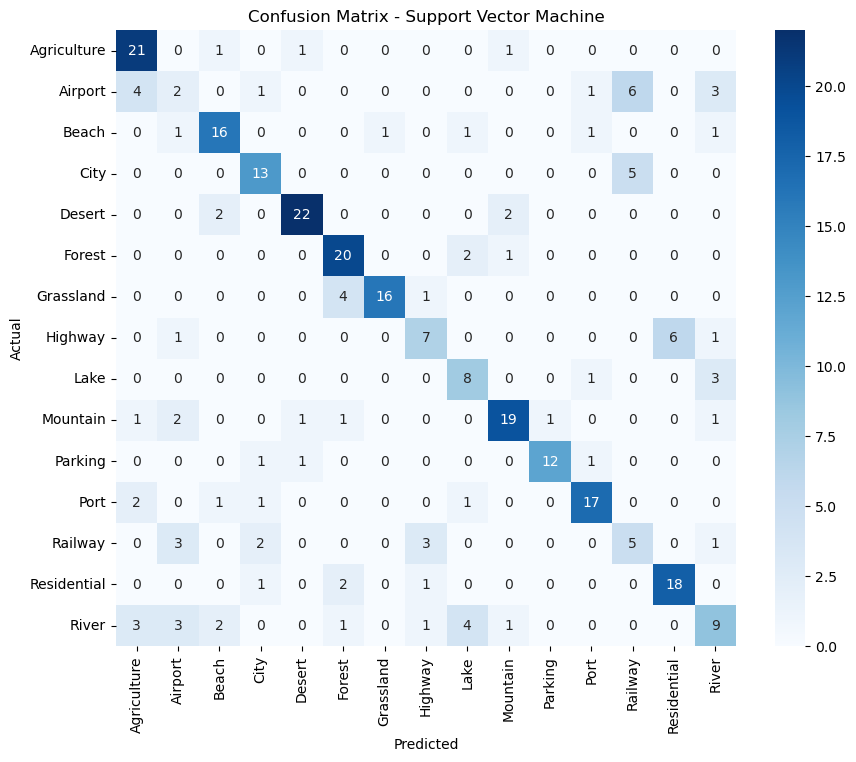


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

 Agriculture       0.68      0.88      0.76        24
     Airport       0.17      0.12      0.14        17
       Beach       0.73      0.76      0.74        21
        City       0.68      0.72      0.70        18
      Desert       0.88      0.85      0.86        26
      Forest       0.71      0.87      0.78        23
   Grassland       0.94      0.76      0.84        21
     Highway       0.54      0.47      0.50        15
        Lake       0.50      0.67      0.57        12
    Mountain       0.79      0.73      0.76        26
     Parking       0.92      0.80      0.86        15
        Port       0.81      0.77      0.79        22
     Railway       0.31      0.36      0.33        14
 Residential       0.75      0.82      0.78        22
       River       0.47      0.38      0.42        24

    accuracy                           0.68       300
   macro avg       0.66      

RandomForestClassifier(random_state=0)


Random Forest Evaluation:
Accuracy: 73.33%
F1 Score: 0.7250
Precision: 0.7327
Recall: 0.7333


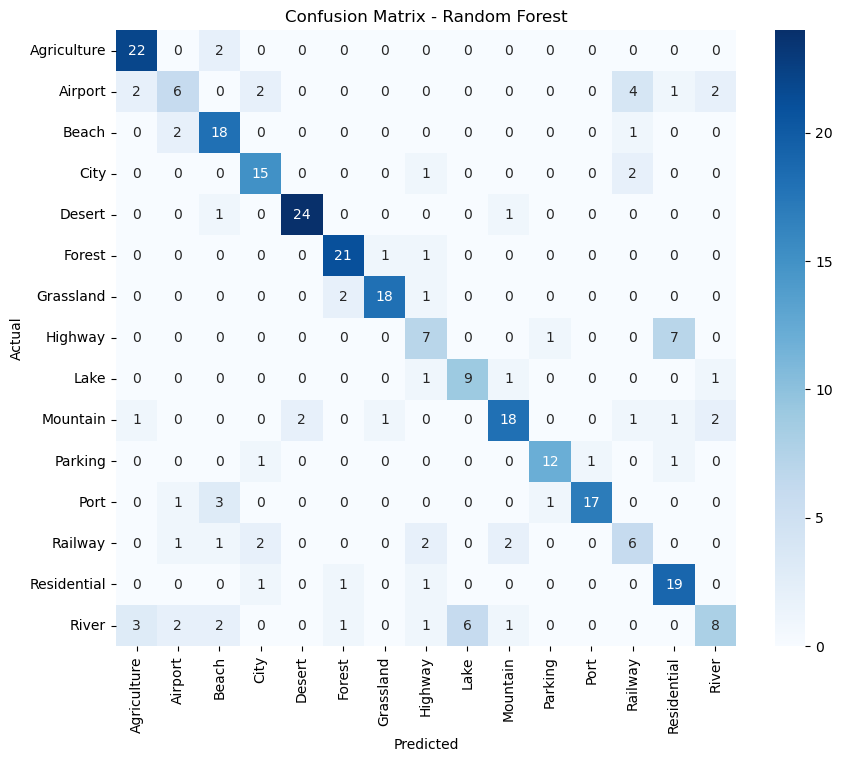


Classification Report for Random Forest:
              precision    recall  f1-score   support

 Agriculture       0.79      0.92      0.85        24
     Airport       0.50      0.35      0.41        17
       Beach       0.67      0.86      0.75        21
        City       0.71      0.83      0.77        18
      Desert       0.92      0.92      0.92        26
      Forest       0.84      0.91      0.88        23
   Grassland       0.90      0.86      0.88        21
     Highway       0.47      0.47      0.47        15
        Lake       0.60      0.75      0.67        12
    Mountain       0.78      0.69      0.73        26
     Parking       0.86      0.80      0.83        15
        Port       0.94      0.77      0.85        22
     Railway       0.43      0.43      0.43        14
 Residential       0.66      0.86      0.75        22
       River       0.62      0.33      0.43        24

    accuracy                           0.73       300
   macro avg       0.71      0.72     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


XGBoost Evaluation:
Accuracy: 71.33%
F1 Score: 0.7116
Precision: 0.7189
Recall: 0.7133


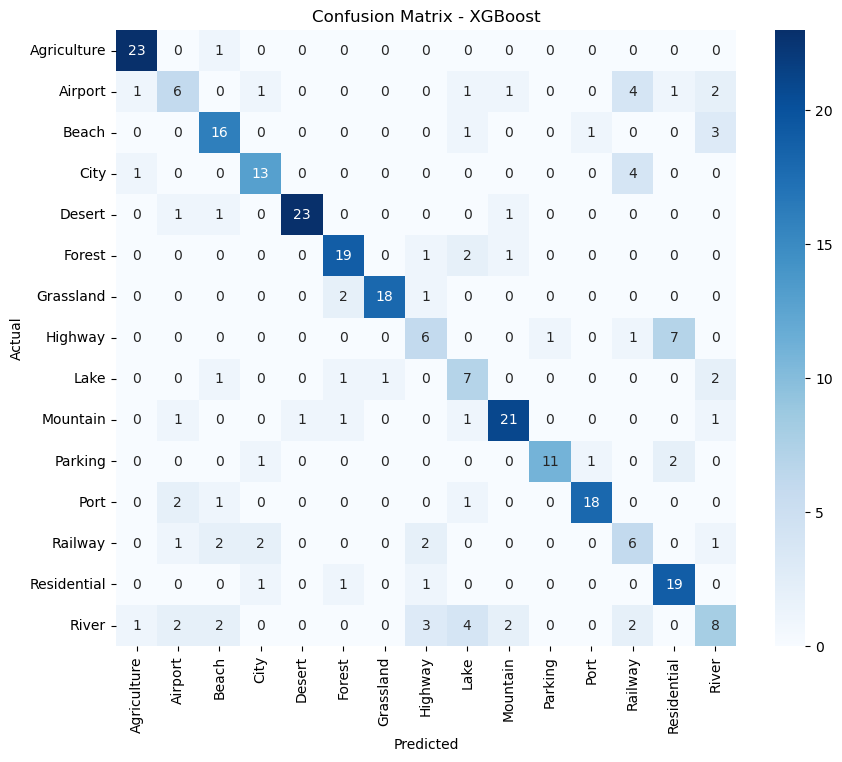


Classification Report for XGBoost:
              precision    recall  f1-score   support

 Agriculture       0.88      0.96      0.92        24
     Airport       0.46      0.35      0.40        17
       Beach       0.67      0.76      0.71        21
        City       0.72      0.72      0.72        18
      Desert       0.96      0.88      0.92        26
      Forest       0.79      0.83      0.81        23
   Grassland       0.95      0.86      0.90        21
     Highway       0.43      0.40      0.41        15
        Lake       0.41      0.58      0.48        12
    Mountain       0.81      0.81      0.81        26
     Parking       0.92      0.73      0.81        15
        Port       0.90      0.82      0.86        22
     Railway       0.35      0.43      0.39        14
 Residential       0.66      0.86      0.75        22
       River       0.47      0.33      0.39        24

    accuracy                           0.71       300
   macro avg       0.69      0.69      0.69 

In [86]:
#color lbp
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def extract_color_lbp_features(image, num_points=16, radius=3):
    """Enhanced LBP with color information using LAB color space"""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    features = []

    for ch in range(3):
        channel = lab[:, :, ch]
        lbp = feature.local_binary_pattern(channel, num_points, radius, method="uniform")
        hist = np.histogram(lbp, bins=num_points + 2, range=(0, num_points + 2))[0]
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    for ch in range(3):
        hist = cv2.calcHist([lab], [ch], None, [16], [0, 256])
        hist = hist.flatten()
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    return np.array(features)


def evaluate_model(model, X_test, y_test, model_name, categories):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=categories))

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

categories = [
    "Agriculture", "Airport", "Beach", "City", "Desert",
    "Forest", "Grassland", "Highway", "Lake", "Mountain",
    "Parking", "Port", "Railway", "Residential", "River"
]

data = []
labels = []

base_path = "Landscapes"

for category in categories:
    category_path = os.path.join(base_path, category)
    for i in range(1, 101):
        img_path = os.path.join(category_path, f"{i:03d}.jpg")
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_color_lbp_features(image)
            data.append(features)
            labels.append(category)

data = np.array(data)
labels = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = [
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0)
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
    }
]

results = []
for clf in classifiers:
    print(f"\nTraining {clf['name']}...")
    clf['model'].fit(X_train_scaled, y_train)

    metrics = evaluate_model(clf['model'], X_test_scaled, y_test, clf['name'], categories)
    results.append(metrics)


print("\nSummary of Results:")
for result in results:
    print(f"\n{result['model']}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1 Score: {result['f1']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")

In [88]:
#all types, color lbp with classifiers including knn, svm, random forest and XGboost
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import time

def extract_color_lbp_features(image, num_points=16, radius=3):
    """Enhanced LBP with color information using LAB color space"""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    features = []

    for ch in range(3):
        channel = lab[:, :, ch]
        lbp = feature.local_binary_pattern(channel, num_points, radius, method="uniform")
        hist = np.histogram(lbp, bins=num_points + 2, range=(0, num_points + 2))[0]
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    for ch in range(3):
        hist = cv2.calcHist([lab], [ch], None, [16], [0, 256])
        hist = hist.flatten()
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    return np.array(features)

categories = [
    "Agriculture", "Airport", "Beach", "City", "Desert",
    "Forest", "Grassland", "Highway", "Lake", "Mountain",
    "Parking", "Port", "Railway", "Residential", "River"
]
base_path = "Landscapes"

params = [
    {"num_points": 8, "radius": 1},
    {"num_points": 8, "radius": 3},
    {"num_points": 8, "radius": 8},
    {"num_points": 16, "radius": 1},
    {"num_points": 16, "radius": 3},
    {"num_points": 16, "radius": 8},
    {"num_points": 24, "radius": 1},
    {"num_points": 24, "radius": 3},
    {"num_points": 24, "radius": 8},
]

classifiers = [
    ("KNN", KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')),
    ("SVM", SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)),
    ("XGBoost", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))
]

def evaluate_all_combinations():
    data = []
    labels = []
    
    for category in categories:
        category_path = os.path.join(base_path, category)
        for i in range(1, 101):
            img_path = os.path.join(category_path, f"{i:03d}.jpg")
            image = cv2.imread(img_path)
            if image is not None:
                data.append(image)
                labels.append(category)
    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(labels)
    
    results = []
    
    for param in params:
        print(f"\nProcessing parameter set: {param}")
        
        X = np.array([extract_color_lbp_features(img, **param) for img in data])
        X_scaled = StandardScaler().fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=0.2, random_state=0
        )
        
        for clf_name, clf in classifiers:
            start_time = time.time()
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            elapsed = time.time() - start_time
            
            results.append({
                "Parameters": f"P={param['num_points']}, R={param['radius']}",
                "Classifier": clf_name,
                "Accuracy": acc,
                "Time (s)": elapsed
            })
    
    df_results = pd.DataFrame(results)
    
    pivot_acc = df_results.pivot_table(
        index="Parameters", 
        columns="Classifier", 
        values="Accuracy",
        aggfunc='mean'
    ).style.background_gradient(cmap='Blues').format("{:.3f}")
    
    pivot_time = df_results.pivot_table(
        index="Parameters", 
        columns="Classifier", 
        values="Time (s)",
        aggfunc='mean'
    ).style.background_gradient(cmap='Reds').format("{:.2f}")
    
    print("\n=== Accuracy Comparison ===")
    display(pivot_acc)
    
    print("\n=== Computation Time Comparison (seconds) ===")
    display(pivot_time)
    
    return df_results

full_results = evaluate_all_combinations()


Processing parameter set: {'num_points': 8, 'radius': 1}

Processing parameter set: {'num_points': 8, 'radius': 3}

Processing parameter set: {'num_points': 8, 'radius': 8}

Processing parameter set: {'num_points': 16, 'radius': 1}

Processing parameter set: {'num_points': 16, 'radius': 3}

Processing parameter set: {'num_points': 16, 'radius': 8}

Processing parameter set: {'num_points': 24, 'radius': 1}

Processing parameter set: {'num_points': 24, 'radius': 3}

Processing parameter set: {'num_points': 24, 'radius': 8}

=== Accuracy Comparison ===


Classifier,KNN,Random Forest,SVM,XGBoost
Parameters,,,,
"P=16, R=1",0.637,0.747,0.693,0.723
"P=16, R=3",0.667,0.730,0.683,0.713
"P=16, R=8",0.673,0.760,0.727,0.720
"P=24, R=1",0.647,0.720,0.693,0.740
"P=24, R=3",0.667,0.720,0.697,0.747
"P=24, R=8",0.657,0.703,0.710,0.710
"P=8, R=1",0.653,0.747,0.670,0.707
"P=8, R=3",0.623,0.727,0.667,0.713
"P=8, R=8",0.670,0.747,0.677,0.720



=== Computation Time Comparison (seconds) ===


Classifier,KNN,Random Forest,SVM,XGBoost
Parameters,,,,
"P=16, R=1",0.08,0.81,0.14,1.58
"P=16, R=3",0.08,0.90,0.17,1.55
"P=16, R=8",0.07,0.87,0.16,1.57
"P=24, R=1",0.09,1.09,0.16,1.78
"P=24, R=3",0.07,1.07,0.16,1.77
"P=24, R=8",0.07,0.98,0.17,1.75
"P=8, R=1",0.08,0.62,0.14,1.41
"P=8, R=3",0.07,0.62,0.16,1.44
"P=8, R=8",0.07,0.72,0.15,1.43



Training K-Nearest Neighbors...


KNeighborsClassifier(weights='distance')


K-Nearest Neighbors Evaluation:
Accuracy: 72.17%
F1 Score: 0.7193
Precision: 0.7237
Recall: 0.7217


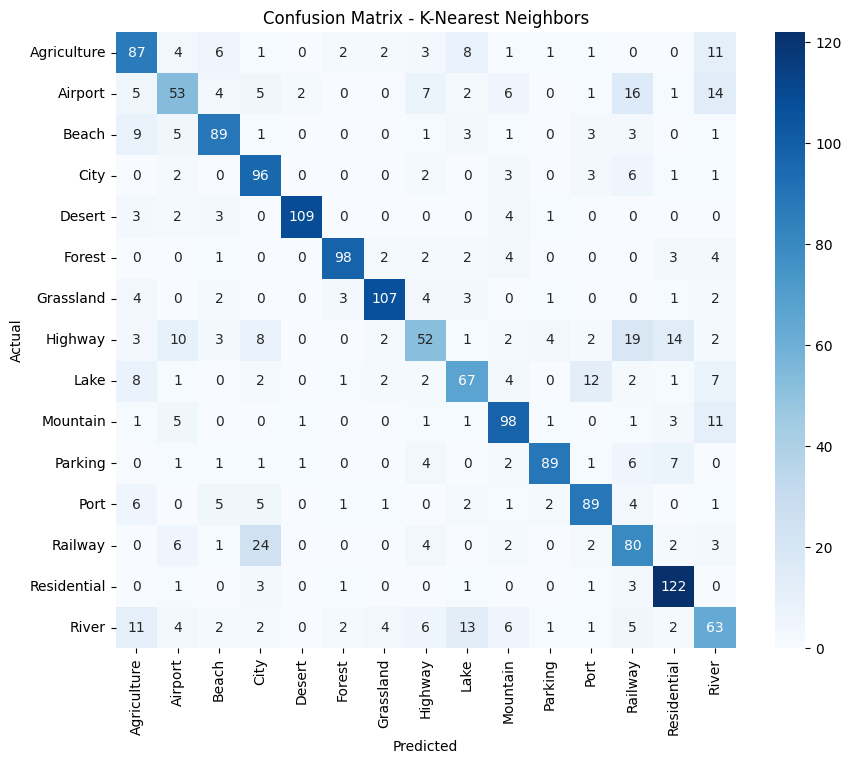


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

 Agriculture       0.64      0.69      0.66       127
     Airport       0.56      0.46      0.50       116
       Beach       0.76      0.77      0.76       116
        City       0.65      0.84      0.73       114
      Desert       0.96      0.89      0.93       122
      Forest       0.91      0.84      0.88       116
   Grassland       0.89      0.84      0.87       127
     Highway       0.59      0.43      0.50       122
        Lake       0.65      0.61      0.63       109
    Mountain       0.73      0.80      0.76       123
     Parking       0.89      0.79      0.84       113
        Port       0.77      0.76      0.76       117
     Railway       0.55      0.65      0.59       124
 Residential       0.78      0.92      0.84       132
       River       0.53      0.52      0.52       122

    accuracy                           0.72      1800
   macro avg       0.72      0.7

SVC(gamma='auto', random_state=0)


Support Vector Machine Evaluation:
Accuracy: 77.78%
F1 Score: 0.7768
Precision: 0.7791
Recall: 0.7778


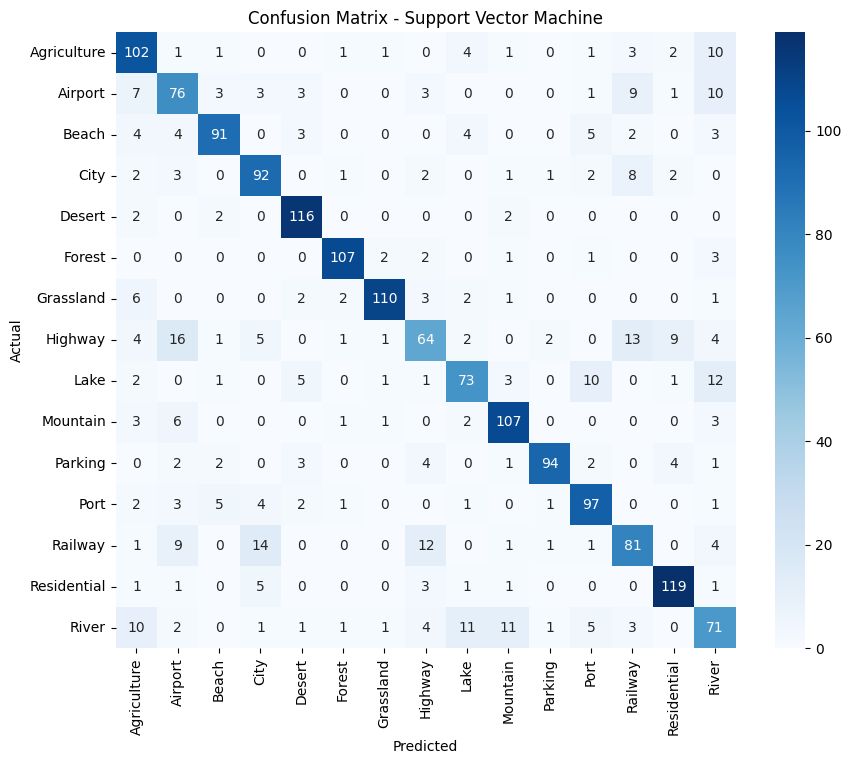


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

 Agriculture       0.70      0.80      0.75       127
     Airport       0.62      0.66      0.64       116
       Beach       0.86      0.78      0.82       116
        City       0.74      0.81      0.77       114
      Desert       0.86      0.95      0.90       122
      Forest       0.93      0.92      0.93       116
   Grassland       0.94      0.87      0.90       127
     Highway       0.65      0.52      0.58       122
        Lake       0.73      0.67      0.70       109
    Mountain       0.82      0.87      0.85       123
     Parking       0.94      0.83      0.88       113
        Port       0.78      0.83      0.80       117
     Railway       0.68      0.65      0.67       124
 Residential       0.86      0.90      0.88       132
       River       0.57      0.58      0.58       122

    accuracy                           0.78      1800
   macro avg       0.78      

RandomForestClassifier(random_state=0)


Random Forest Evaluation:
Accuracy: 76.61%
F1 Score: 0.7640
Precision: 0.7654
Recall: 0.7661


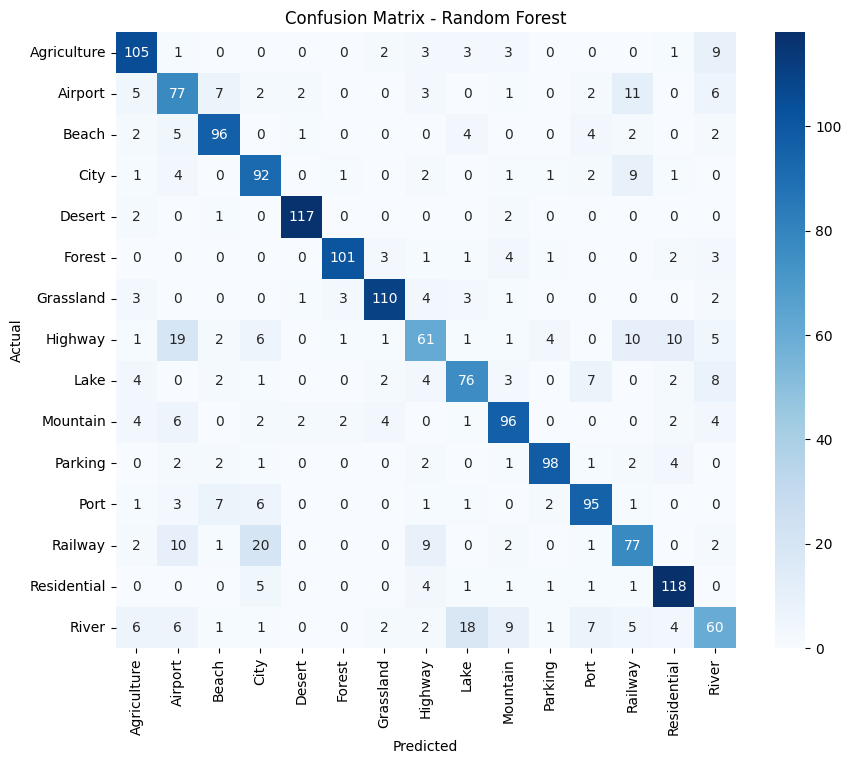


Classification Report for Random Forest:
              precision    recall  f1-score   support

 Agriculture       0.77      0.83      0.80       127
     Airport       0.58      0.66      0.62       116
       Beach       0.81      0.83      0.82       116
        City       0.68      0.81      0.74       114
      Desert       0.95      0.96      0.96       122
      Forest       0.94      0.87      0.90       116
   Grassland       0.89      0.87      0.88       127
     Highway       0.64      0.50      0.56       122
        Lake       0.70      0.70      0.70       109
    Mountain       0.77      0.78      0.77       123
     Parking       0.91      0.87      0.89       113
        Port       0.79      0.81      0.80       117
     Railway       0.65      0.62      0.64       124
 Residential       0.82      0.89      0.86       132
       River       0.59      0.49      0.54       122

    accuracy                           0.77      1800
   macro avg       0.76      0.77     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)


XGBoost Evaluation:
Accuracy: 76.11%
F1 Score: 0.7613
Precision: 0.7624
Recall: 0.7611


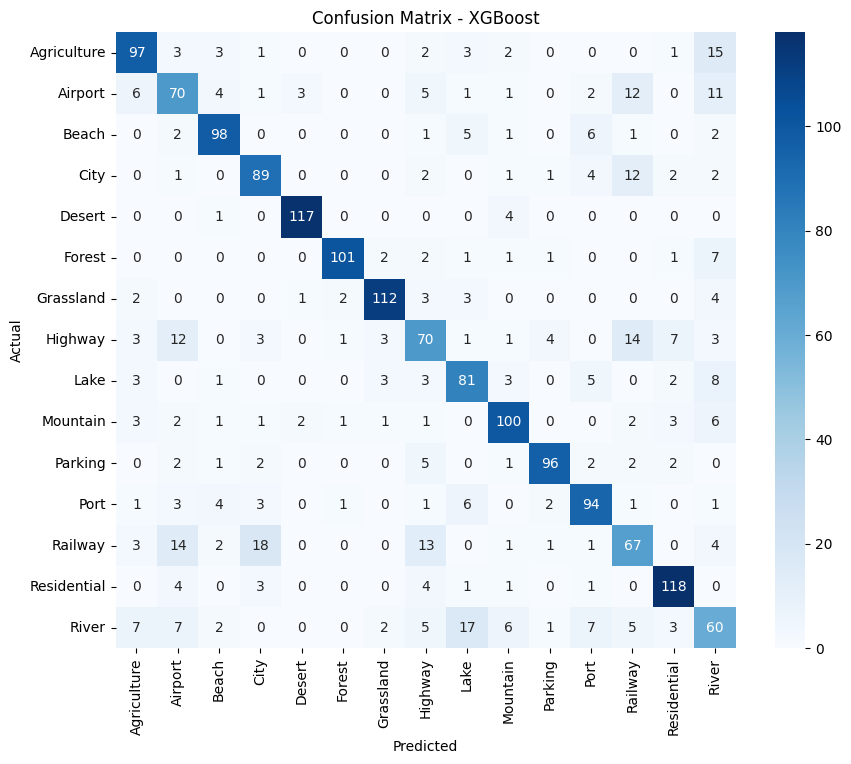


Classification Report for XGBoost:
              precision    recall  f1-score   support

 Agriculture       0.78      0.76      0.77       127
     Airport       0.58      0.60      0.59       116
       Beach       0.84      0.84      0.84       116
        City       0.74      0.78      0.76       114
      Desert       0.95      0.96      0.96       122
      Forest       0.95      0.87      0.91       116
   Grassland       0.91      0.88      0.90       127
     Highway       0.60      0.57      0.59       122
        Lake       0.68      0.74      0.71       109
    Mountain       0.81      0.81      0.81       123
     Parking       0.91      0.85      0.88       113
        Port       0.77      0.80      0.79       117
     Railway       0.58      0.54      0.56       124
 Residential       0.85      0.89      0.87       132
       River       0.49      0.49      0.49       122

    accuracy                           0.76      1800
   macro avg       0.76      0.76      0.76 

In [9]:
#color lbp 600 0f 800 data
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


def extract_color_lbp_features(image, num_points=16, radius=3):
    """Enhanced LBP with color information using LAB color space"""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    features = []

    for ch in range(3):
        channel = lab[:, :, ch]
        lbp = feature.local_binary_pattern(channel, num_points, radius, method="uniform")
        hist = np.histogram(lbp, bins=num_points + 2, range=(0, num_points + 2))[0]
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    for ch in range(3):
        hist = cv2.calcHist([lab], [ch], None, [16], [0, 256])
        hist = hist.flatten()
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    return np.array(features)


def evaluate_model(model, X_test, y_test, model_name, categories):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, zero_division=0, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=categories, yticklabels=categories)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=categories))

    return {
        'model': model_name,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

categories = [
    "Agriculture", "Airport", "Beach", "City", "Desert",
    "Forest", "Grassland", "Highway", "Lake", "Mountain",
    "Parking", "Port", "Railway", "Residential", "River"
]

data = []
labels = []

base_path = "Landscapes"

for category in categories:
    category_path = os.path.join(base_path, category)
    for i in range(1, 601):
        img_path = os.path.join(category_path, f"{i:03d}.jpg")
        image = cv2.imread(img_path)
        if image is not None:
            features = extract_color_lbp_features(image)
            data.append(features)
            labels.append(category)

data = np.array(data)
labels = np.array(labels)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(data, y_encoded, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = [
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')
    },
    {
        'name': 'Support Vector Machine',
        'model': SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0)
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
    }
]

results = []
for clf in classifiers:
    print(f"\nTraining {clf['name']}...")
    clf['model'].fit(X_train_scaled, y_train)

    metrics = evaluate_model(clf['model'], X_test_scaled, y_test, clf['name'], categories)
    results.append(metrics)


print("\nSummary of Results:")
for result in results:
    print(f"\n{result['model']}:")
    print(f"  Accuracy: {result['accuracy']:.4f}")
    print(f"  F1 Score: {result['f1']:.4f}")
    print(f"  Precision: {result['precision']:.4f}")
    print(f"  Recall: {result['recall']:.4f}")

In [11]:
#color lbp all data
import os
import cv2
import numpy as np
from skimage import feature
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import time

def extract_color_lbp_features(image, num_points=16, radius=3):
    """Enhanced LBP with color information using LAB color space"""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    features = []

    for ch in range(3):
        channel = lab[:, :, ch]
        lbp = feature.local_binary_pattern(channel, num_points, radius, method="uniform")
        hist = np.histogram(lbp, bins=num_points + 2, range=(0, num_points + 2))[0]
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    for ch in range(3):
        hist = cv2.calcHist([lab], [ch], None, [16], [0, 256])
        hist = hist.flatten()
        hist /= (hist.sum() + 1e-7)
        features.extend(hist)

    return np.array(features)

categories = [
    "Agriculture", "Airport", "Beach", "City", "Desert",
    "Forest", "Grassland", "Highway", "Lake", "Mountain",
    "Parking", "Port", "Railway", "Residential", "River"
]
base_path = "Landscapes"

params = [
    {"num_points": 8, "radius": 1},
    {"num_points": 8, "radius": 3},
    {"num_points": 8, "radius": 8},
    {"num_points": 16, "radius": 1},
    {"num_points": 16, "radius": 3},
    {"num_points": 16, "radius": 8},
    {"num_points": 24, "radius": 1},
    {"num_points": 24, "radius": 3},
    {"num_points": 24, "radius": 8},
]

classifiers = [
    ("KNN", KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto')),
    ("SVM", SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0)),
    ("XGBoost", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))
]

def evaluate_all_combinations():
    # Load and preprocess data
    print("Loading images and extracting features...")
    data = []
    labels = []
    
    for category in categories:
        print(f"Processing {category}...")
        category_path = os.path.join(base_path, category)
        for i in range(1, 601):
            img_path = os.path.join(category_path, f"{i:03d}.jpg")
            image = cv2.imread(img_path)
            if image is not None:
                data.append(image)
                labels.append(category)
    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(labels)
    
    results = []
    
    # Cross-validation setup
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    
    for param in params:
        print(f"\nProcessing parameter set: P={param['num_points']}, R={param['radius']}")
        
        # Extract features with current parameters
        X = np.array([extract_color_lbp_features(img, **param) for img in data])
        X_scaled = StandardScaler().fit_transform(X)
        
        # Train-test split for final evaluation
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=0.2, random_state=0
        )
        
        for clf_name, clf in classifiers:
            print(f"  Evaluating {clf_name}...")
            start_time = time.time()
            
            # Cross-validation
            cv_scores = cross_val_score(clf, X_scaled, y_encoded, cv=cv, scoring='accuracy')
            cv_mean = np.mean(cv_scores)
            cv_std = np.std(cv_scores)
            
            # Final training and evaluation
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred)
            elapsed = time.time() - start_time
            
            results.append({
                "Parameters": f"P={param['num_points']}, R={param['radius']}",
                "Classifier": clf_name,
                "CV Mean": cv_mean,
                "CV Std": cv_std,
                "Test Acc": test_acc,
                "Time (s)": elapsed
            })
    
    # Create results dataframe
    df_results = pd.DataFrame(results)
    
    # Print results in a simpler format
    print("\n=== Final Results ===")
    for param_set in params:
        param_str = f"P={param_set['num_points']}, R={param_set['radius']}"
        print(f"\nParameter set: {param_str}")
        param_results = df_results[df_results["Parameters"] == param_str]
        
        print("\nClassifier\tCV Mean\tCV Std\tTest Acc\tTime (s)")
        print("------------------------------------------------")
        for _, row in param_results.iterrows():
            print(f"{row['Classifier']}\t{row['CV Mean']:.4f}\t{row['CV Std']:.4f}\t{row['Test Acc']:.4f}\t{row['Time (s)']:.2f}")
    
    return df_results

full_results = evaluate_all_combinations()


Loading images and extracting features...
Processing Agriculture...
Processing Airport...
Processing Beach...
Processing City...
Processing Desert...
Processing Forest...
Processing Grassland...
Processing Highway...
Processing Lake...
Processing Mountain...
Processing Parking...
Processing Port...
Processing Railway...
Processing Residential...
Processing River...

Processing parameter set: P=8, R=1
  Evaluating KNN...
  Evaluating SVM...
  Evaluating Random Forest...
  Evaluating XGBoost...

Processing parameter set: P=8, R=3
  Evaluating KNN...
  Evaluating SVM...
  Evaluating Random Forest...
  Evaluating XGBoost...

Processing parameter set: P=8, R=8
  Evaluating KNN...
  Evaluating SVM...
  Evaluating Random Forest...
  Evaluating XGBoost...

Processing parameter set: P=16, R=1
  Evaluating KNN...
  Evaluating SVM...
  Evaluating Random Forest...
  Evaluating XGBoost...

Processing parameter set: P=16, R=3
  Evaluating KNN...
  Evaluating SVM...
  Evaluating Random Forest...
  Ev